In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# KNN con cols muy sesgadas

Modelo que prediga  si un cliente está Completamente satisfecho o no.  
Usaremos el REVIEW SCORE y lo vamos a transformar en una variable binaria con el siguiente criterio: 
- Review Score = 1,2,3,4, entonces no ha quedado completamente Satisfecho
- Review Score = 5, entonces el cliente ha quedado completamente Satisfecho

0. Importamos datos, se trata de la tabla base que hemos construido.
   
Partimos de 26 columnas, SIN NULOS ya:


 0.    Unnamed: 0                     97916 non-null  int64  
 1.    order_id                       97916 non-null  object 
 2.    media_review_score             97916 non-null  int64  
 3.    fecha_ultima_review            97916 non-null  object 
 4.    order_purchase_timestamp       97916 non-null  object 
 5.    delivered_status               97916 non-null  int64  
 6.    delay_time                     97916 non-null  int64  
 7.    customer_unique_id             97916 non-null  object 
 8.    customer_state                 97916 non-null  object 
 9.    number_payments                97916 non-null  float64
 10.   payment_value_sum              97916 non-null  float64
 11.   payment_type                   97916 non-null  object 
 12.   number_items                   97916 non-null  float64
 13.   total_price                    97916 non-null  float64
 14.   total_freight_value            97916 non-null  float64
 15.   total_diff_items               97916 non-null  float64
 16.   product_id                     97916 non-null  object 
 17.   seller_id                      97916 non-null  object 
 18.   product_description_lenght     97916 non-null  float64
 19.   product_photos_qty             97916 non-null  float64
 20.   product_weight_g               97916 non-null  float64
 21.   product_length_cm              97916 non-null  float64
 22.   product_height_cm              97916 non-null  float64
 23.   product_width_cm               97916 non-null  float64
 24.   product_category_name_english  97916 non-null  object 
 25.   seller_state                   97916 non-null  object 


In [2]:
data = pd.read_csv('final_data (3).csv', sep = ',')
data.head()

,Unnamed: 0,order_id,media_review_score,fecha_ultima_review,order_purchase_timestamp,delivered_status,delay_time,customer_unique_id,customer_state,number_payments,...,product_id,seller_id,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_state
0,0,00010242fe8c5a6d1ba2dd792cb16214,5,2017-09-21,2017-09-13,1,9,871766c5855e863f6eccc05f988b23cb,Southeast,1.0,...,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,598.0,4.0,650.0,28.0,9.0,14.0,Miscellaneous and Other Items,Southeast
1,1,00018f77f2f0320c557190d7a144bdd3,4,2017-05-13,2017-04-26,1,3,eb28e67c4c0b83846050ddfb8a35d051,Southeast,1.0,...,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.0,2.0,30000.0,50.0,30.0,40.0,Miscellaneous and Other Items,Southeast
2,2,000229ec398224ef6ca0657da4fc703e,5,2018-01-23,2018-01-14,1,14,3818d81c6709e39d06b2738a8d3a2474,Southeast,1.0,...,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,695.0,2.0,3050.0,33.0,13.0,33.0,Home and Decoration,Southeast
3,3,00024acbcdf0a6daa1e931b038114c75,4,2018-08-15,2018-08-08,1,6,af861d436cfc08b2c2ddefd0ba074622,Southeast,1.0,...,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,480.0,1.0,200.0,16.0,10.0,15.0,Fashion and Personal Care,Southeast
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,5,2017-03-02,2017-02-04,1,16,64b576fb70d441e8f1b2d7d446e483c5,Southeast,1.0,...,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,409.0,1.0,3750.0,35.0,40.0,30.0,Tools and Construction,South


In [3]:
data.describe()

,Unnamed: 0,media_review_score,delivered_status,delay_time,number_payments,payment_value_sum,number_items,total_price,total_freight_value,total_diff_items,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000
mean,49346.970669,4.104467,0.978706,-9.653570,1.044518,160.367686,1.140825,137.534315,22.804160,1.037900,792.743198,2.246180,2122.376282,30.206698,16.573032,23.112341
std,28485.578875,1.330662,0.144363,146.493093,0.380054,219.286727,0.533752,209.483686,21.621084,0.225802,652.534971,1.749662,3786.553368,16.189133,13.377454,11.785387
min,0.000000,1.000000,0.000000,-1000.000000,1.000000,9.590000,1.000000,0.850000,0.000000,1.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,24682.750000,4.000000,1.000000,7.000000,1.000000,61.930000,1.000000,45.900000,13.840000,1.000000,357.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,49343.500000,5.000000,1.000000,12.000000,1.000000,105.280000,1.000000,86.900000,17.160000,1.000000,603.000000,2.000000,700.000000,25.000000,13.000000,20.000000
75%,74024.250000,5.000000,1.000000,17.000000,1.000000,176.760000,1.000000,149.900000,24.010000,1.000000,994.000000,3.000000,1825.000000,38.000000,20.000000,30.000000
max,98672.000000,5.000000,1.000000,147.000000,29.000000,13664.080000,21.000000,13440.000000,1794.960000,8.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [4]:
resumen_unicos = pd.DataFrame({
    'columna': data.columns,
    'nunicos': [data[col].nunique() for col in data.columns],
   })
print(resumen_unicos)

                          columna  nunicos
0                      Unnamed: 0    97916
1                        order_id    97916
2              media_review_score        5
3             fecha_ultima_review      632
4        order_purchase_timestamp      615
5                delivered_status        2
6                      delay_time      197
7              customer_unique_id    94720
8                  customer_state        6
9                 number_payments       20
10              payment_value_sum    27474
11                   payment_type        5
12                   number_items       17
13                    total_price     7587
14            total_freight_value     7666
15               total_diff_items        8
16                     product_id    30802
17                      seller_id     3066
18     product_description_lenght     2952
19             product_photos_qty       19
20               product_weight_g     2188
21              product_length_cm       99
22         

## 1. Buscar columnas con valores nulos y cantidad de nulos en cada una. NO HAY

In [5]:
resumen_nulos = pd.DataFrame({
    'columna': data.columns,
    'nulos': [data[col].isnull().sum() for col in data.columns],
    'porcentaje': [data[col].isnull().mean() * 100 for col in data.columns],
   })
print(resumen_nulos)

                          columna  nulos  porcentaje
0                      Unnamed: 0      0         0.0
1                        order_id      0         0.0
2              media_review_score      0         0.0
3             fecha_ultima_review      0         0.0
4        order_purchase_timestamp      0         0.0
5                delivered_status      0         0.0
6                      delay_time      0         0.0
7              customer_unique_id      0         0.0
8                  customer_state      0         0.0
9                 number_payments      0         0.0
10              payment_value_sum      0         0.0
11                   payment_type      0         0.0
12                   number_items      0         0.0
13                    total_price      0         0.0
14            total_freight_value      0         0.0
15               total_diff_items      0         0.0
16                     product_id      0         0.0
17                      seller_id      0      

## 2. Duplicados (Posterior a cruces de tablas muy recomendable). NO DEBE HABER

In [6]:
# Número de filas duplicadas completas
data.duplicated().sum()

#  filas duplicadas
duplicados_completos = data[data.duplicated()]
duplicados_completos

,Unnamed: 0,order_id,media_review_score,fecha_ultima_review,order_purchase_timestamp,delivered_status,delay_time,customer_unique_id,customer_state,number_payments,...,product_id,seller_id,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_state


In [7]:
cols_usuales = ['order_id', 'product_id', 'customer_unique_id']

duplicados_usuales = data[data.duplicated(subset=cols_usuales, keep=False)]
duplicados_usuales

,Unnamed: 0,order_id,media_review_score,fecha_ultima_review,order_purchase_timestamp,delivered_status,delay_time,customer_unique_id,customer_state,number_payments,...,product_id,seller_id,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_state


## 3. Fechas. Pasar de Object a datetime64 y extraer componentes

In [8]:
data['fecha_ultima_review'] = pd.to_datetime(data['fecha_ultima_review'])
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

In [9]:
for col in ['fecha_ultima_review', 'order_purchase_timestamp']:
    data[f'{col}_año'] = data[col].dt.year
    data[f'{col}_mes'] = data[col].dt.month
    data[f'{col}_dia'] = data[col].dt.day
    data[f'{col}_dia_semana'] = data[col].dt.dayofweek

In [10]:
resumen_unicos = pd.DataFrame({
    'columna': data.columns,
    'nunicos': [data[col].nunique() for col in data.columns],
   })
print(resumen_unicos)

                                columna  nunicos
0                            Unnamed: 0    97916
1                              order_id    97916
2                    media_review_score        5
3                   fecha_ultima_review      632
4              order_purchase_timestamp      615
5                      delivered_status        2
6                            delay_time      197
7                    customer_unique_id    94720
8                        customer_state        6
9                       number_payments       20
10                    payment_value_sum    27474
11                         payment_type        5
12                         number_items       17
13                          total_price     7587
14                  total_freight_value     7666
15                     total_diff_items        8
16                           product_id    30802
17                            seller_id     3066
18           product_description_lenght     2952
19                  

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97916 entries, 0 to 97915
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Unnamed: 0                           97916 non-null  int64         
 1   order_id                             97916 non-null  object        
 2   media_review_score                   97916 non-null  int64         
 3   fecha_ultima_review                  97916 non-null  datetime64[ns]
 4   order_purchase_timestamp             97916 non-null  datetime64[ns]
 5   delivered_status                     97916 non-null  int64         
 6   delay_time                           97916 non-null  int64         
 7   customer_unique_id                   97916 non-null  object        
 8   customer_state                       97916 non-null  object        
 9   number_payments                      97916 non-null  float64       
 10  payment_va

## 4. Realizar histplot de las var numéricas, countplot de todas las var categóricas y barras para las fechas (desagrupadas)

### 4.1 Variables numéricas

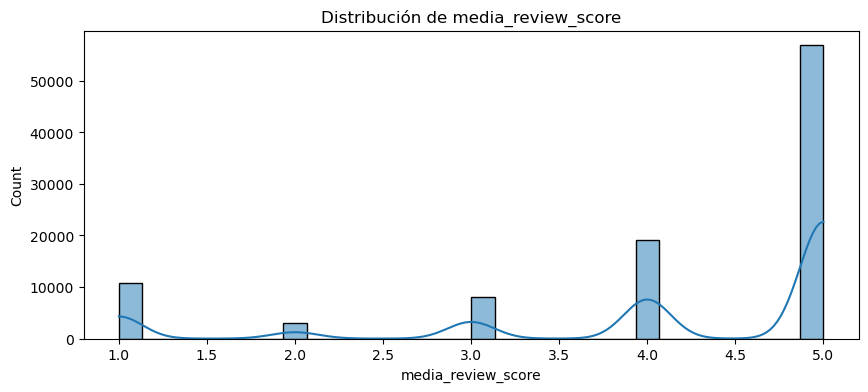

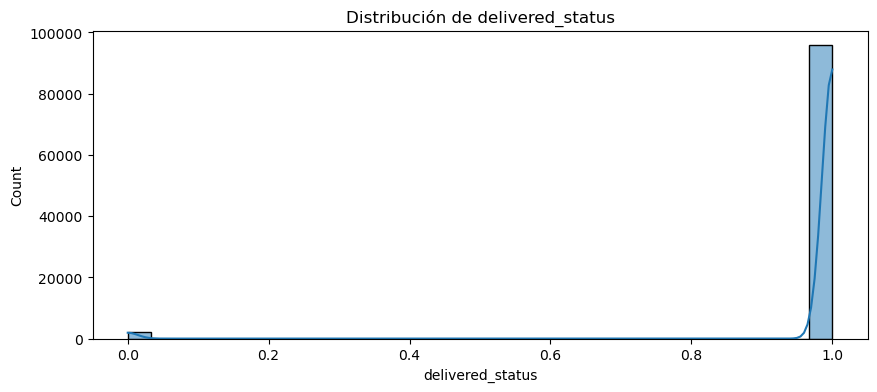

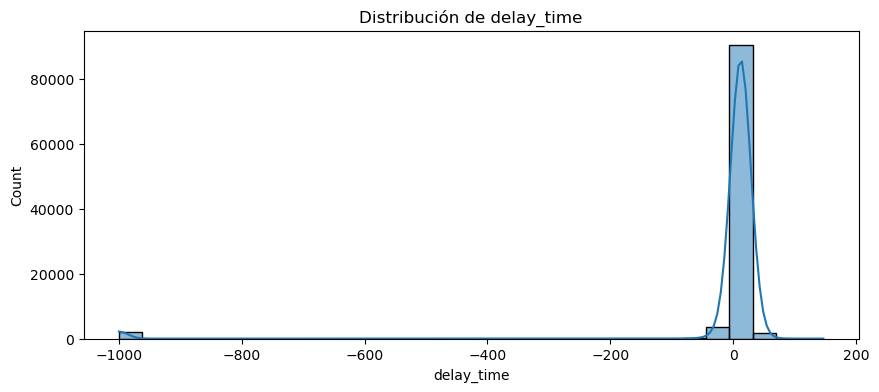

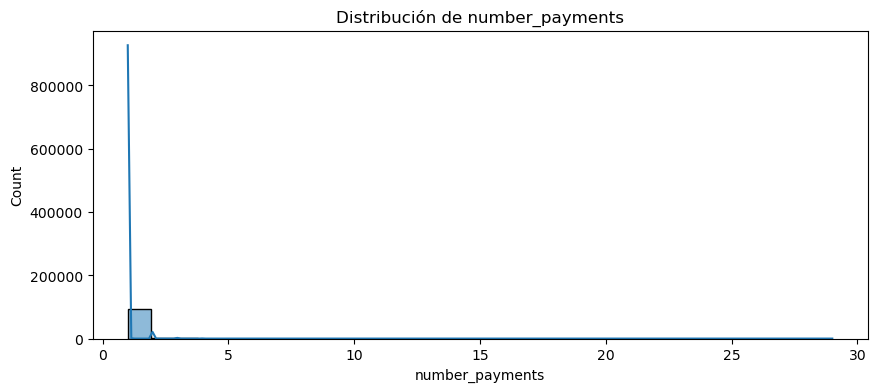

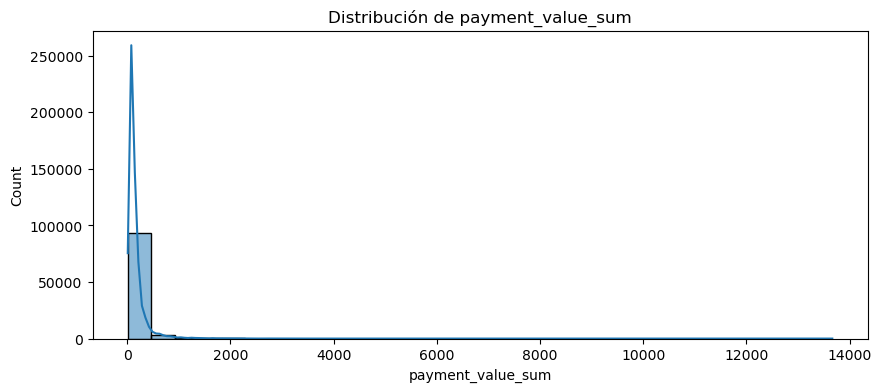

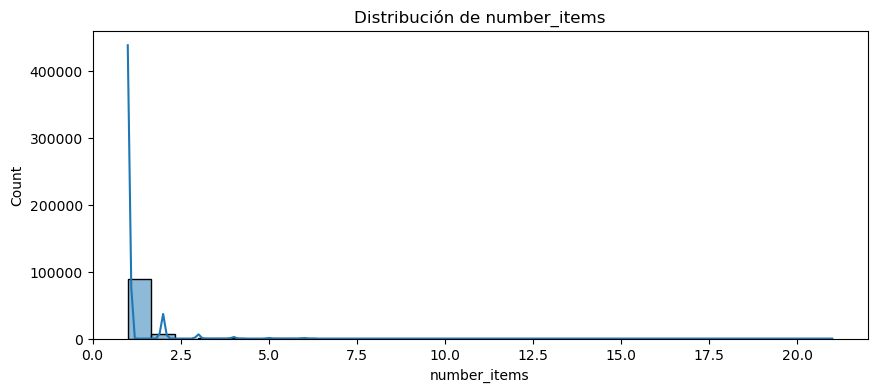

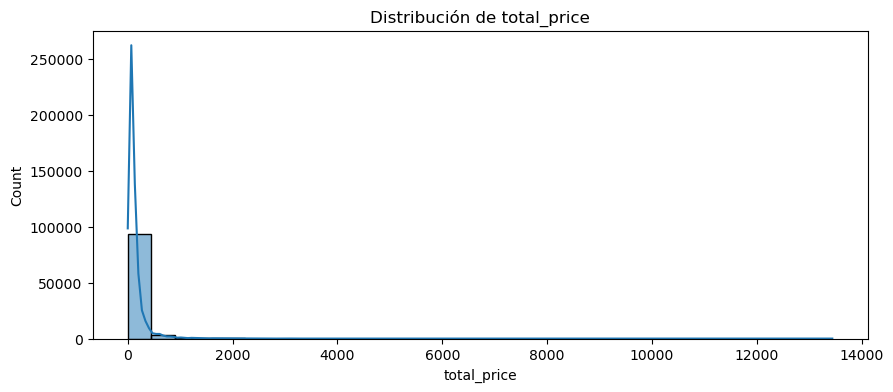

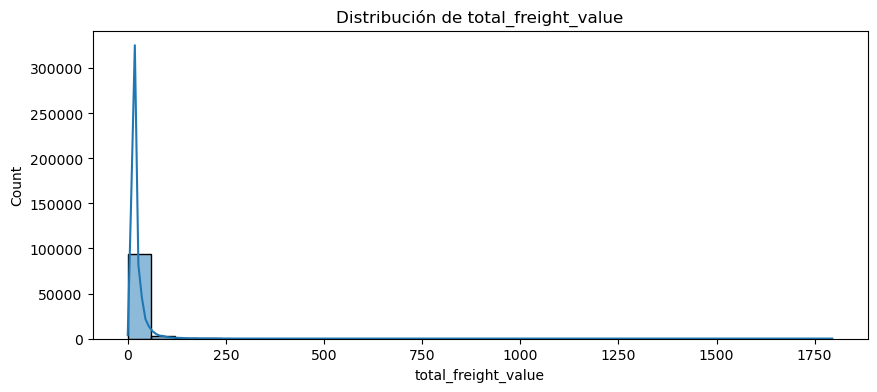

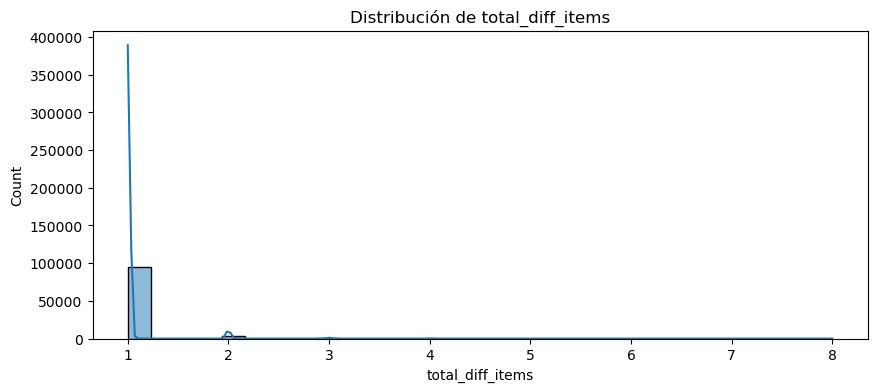

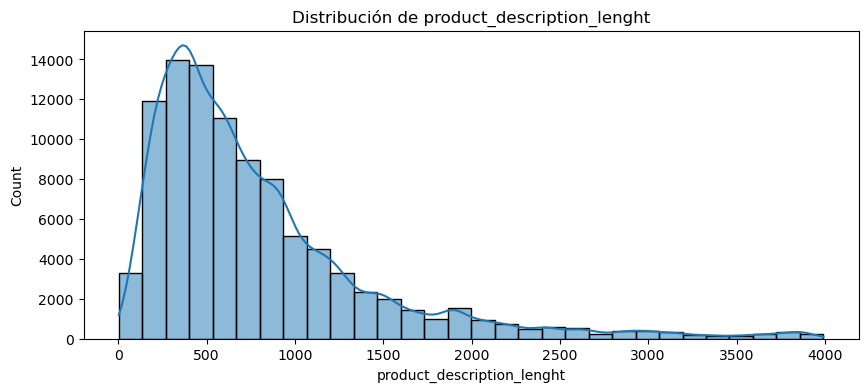

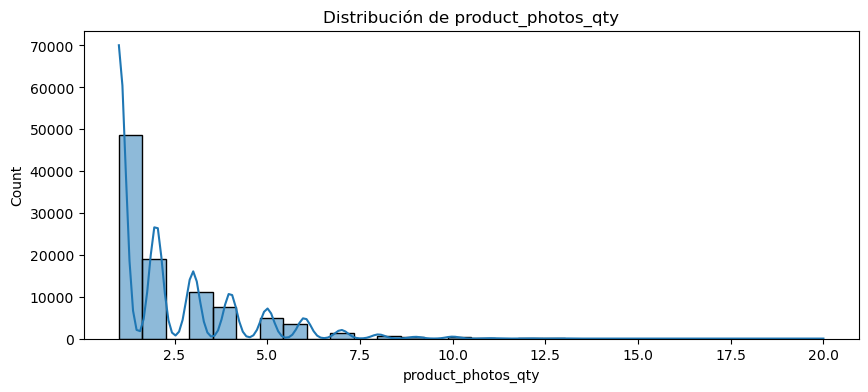

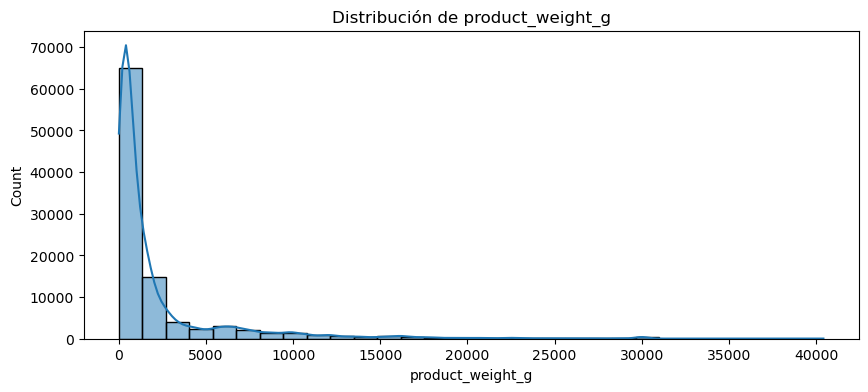

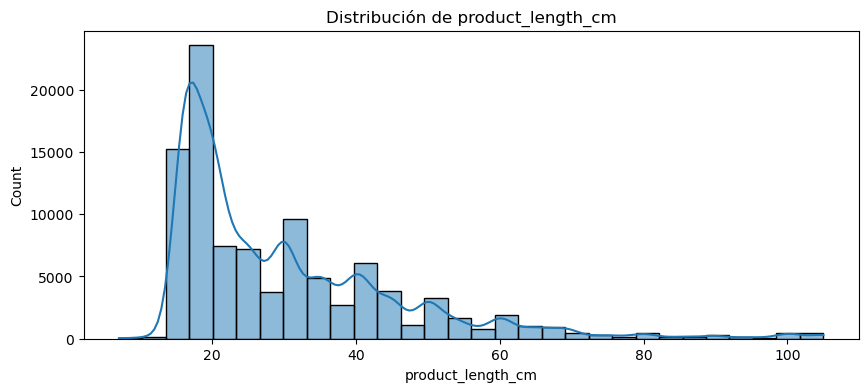

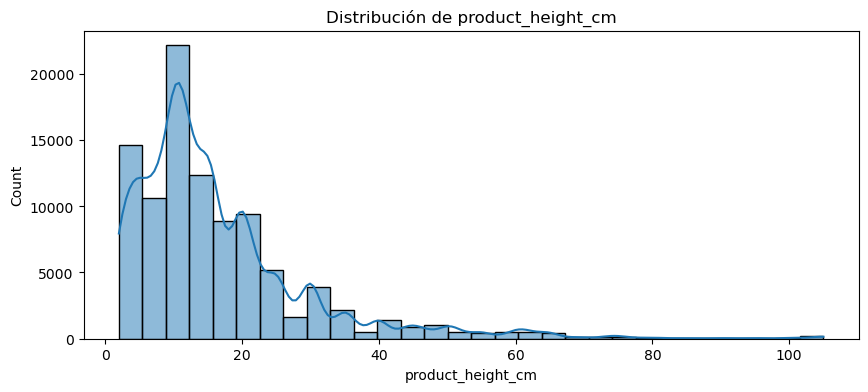

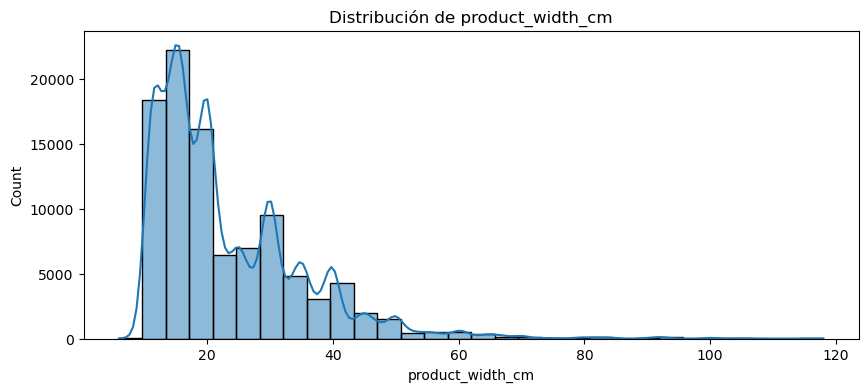

In [12]:
numericas = ['media_review_score', 'delivered_status','delay_time', 'number_payments', 'payment_value_sum',
             'number_items', 'total_price', 'total_freight_value', 'total_diff_items',
             'product_description_lenght', 'product_photos_qty', 'product_weight_g',
             'product_length_cm', 'product_height_cm', 'product_width_cm']

for col in numericas:
    plt.figure(figsize=(10,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.show()

### 4.2 Variables categóricas

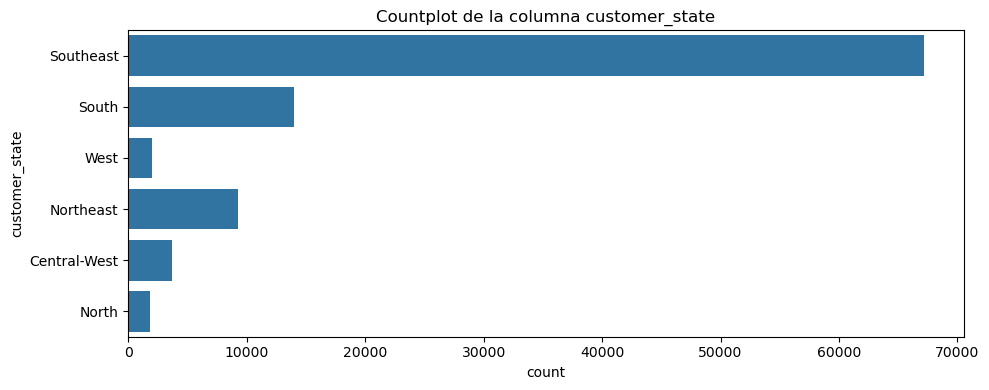

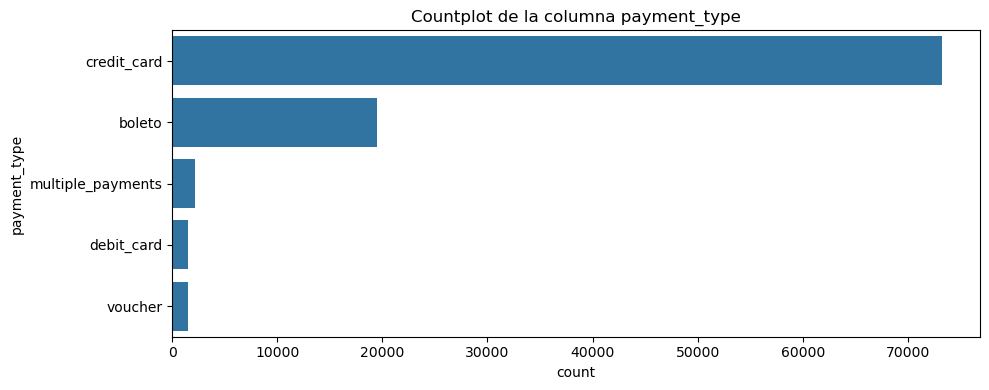

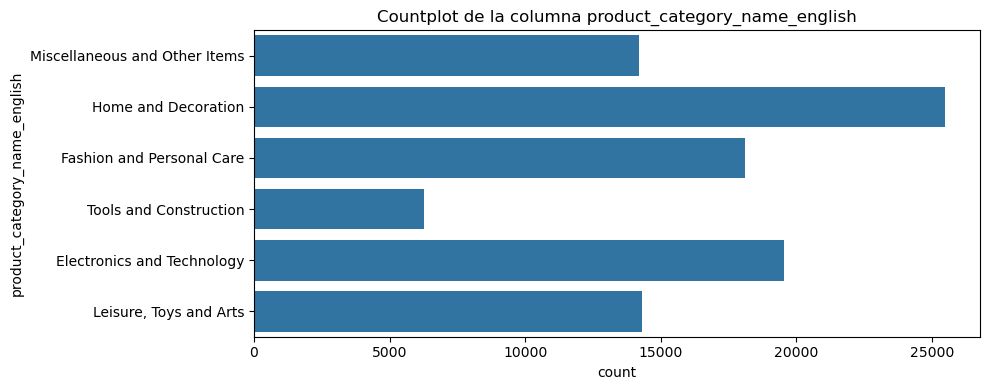

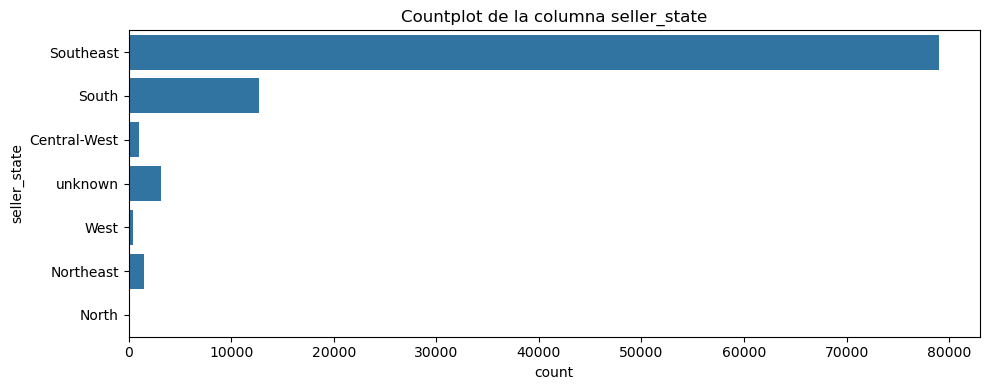

In [13]:
categoricas = ['customer_state', 'payment_type', 'product_category_name_english', 'seller_state']

for col in categoricas:
    plt.figure(figsize=(10,4))   # mismo ancho y alto para todos
    sns.countplot(data=data, y=col)
    plt.title(f'Countplot de la columna {col}')
    plt.tight_layout()            # evita que se corte el texto
    plt.show()

In [14]:
# Agrupaciones:
data['customer_state_grouped'] = np.where(data['customer_state'] == 'Southeast','Southeast', 'Others')
data['seller_state_grouped'] = np.where(data['seller_state'] == 'Southeast','Southeast', 'Others')
data['payment_type_grouped'] = np.where(data['payment_type'] == 'credit_card','credit_card', 'Others')

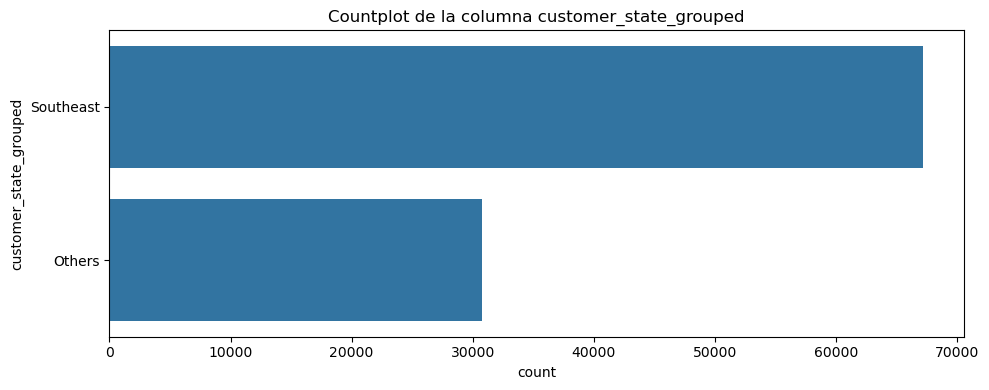

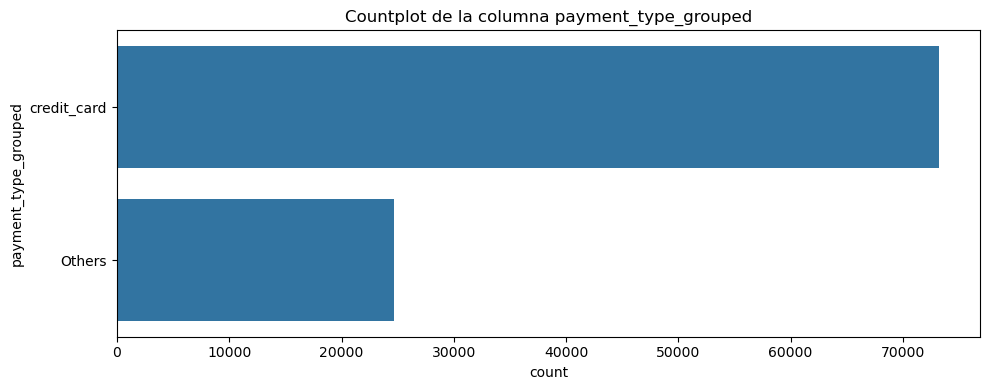

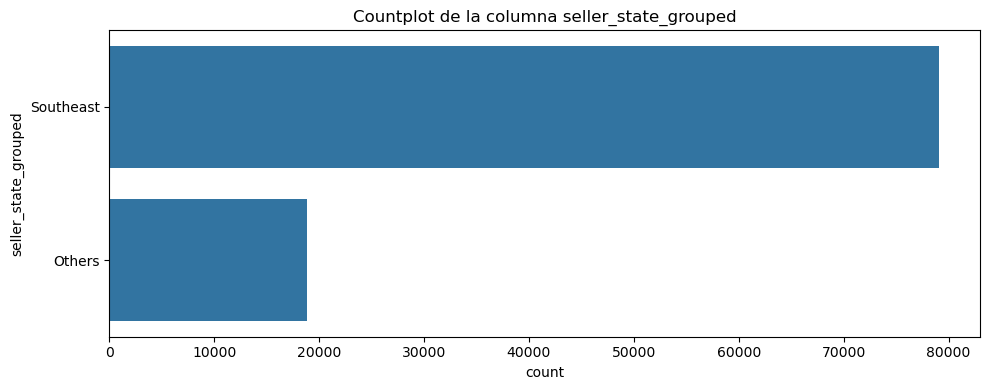

In [15]:
categoricas_agrupadas = ['customer_state_grouped', 'payment_type_grouped', 'seller_state_grouped']

for col in categoricas_agrupadas:
    plt.figure(figsize=(10,4))   # mismo ancho y alto para todos
    sns.countplot(data=data, y=col)
    plt.title(f'Countplot de la columna {col}')
    plt.tight_layout()            # evita que se corte el texto
    plt.show()

### 4.3 Fechas vs reviews

C:\Users\usuario\AppData\Local\Temp\ipykernel_15188\808447261.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='media_review_score', data=promedio, palette='coolwarm')


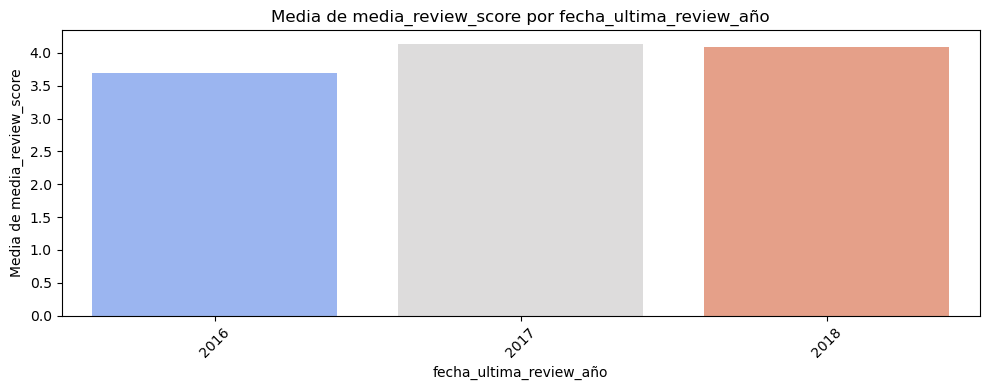

C:\Users\usuario\AppData\Local\Temp\ipykernel_15188\808447261.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='media_review_score', data=promedio, palette='coolwarm')


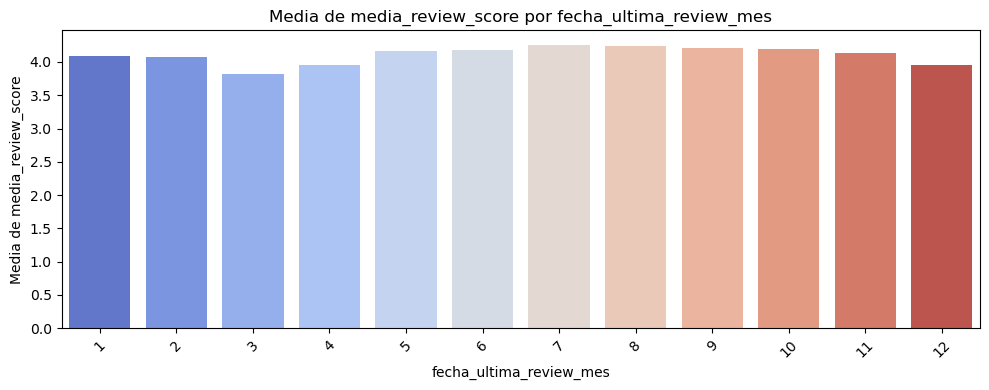

C:\Users\usuario\AppData\Local\Temp\ipykernel_15188\808447261.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='media_review_score', data=promedio, palette='coolwarm')


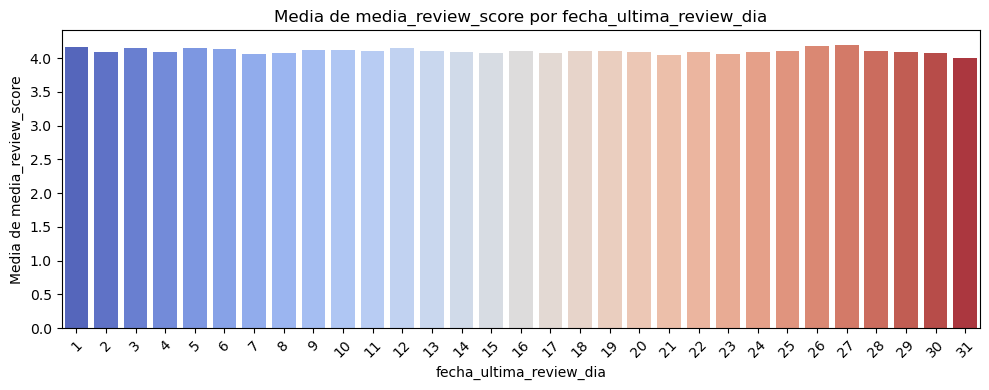

C:\Users\usuario\AppData\Local\Temp\ipykernel_15188\808447261.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='media_review_score', data=promedio, palette='coolwarm')


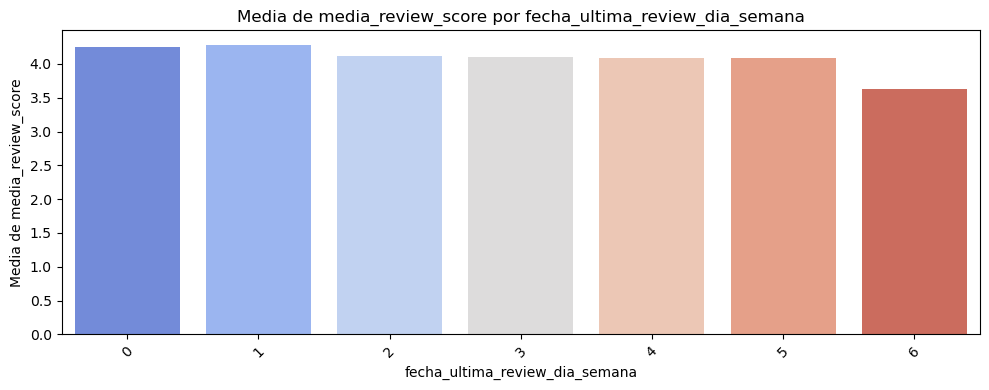

C:\Users\usuario\AppData\Local\Temp\ipykernel_15188\808447261.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='media_review_score', data=promedio, palette='coolwarm')


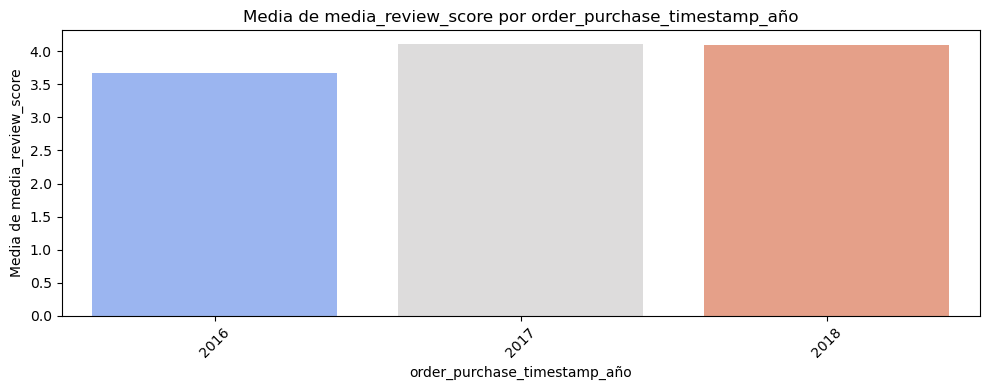

C:\Users\usuario\AppData\Local\Temp\ipykernel_15188\808447261.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='media_review_score', data=promedio, palette='coolwarm')


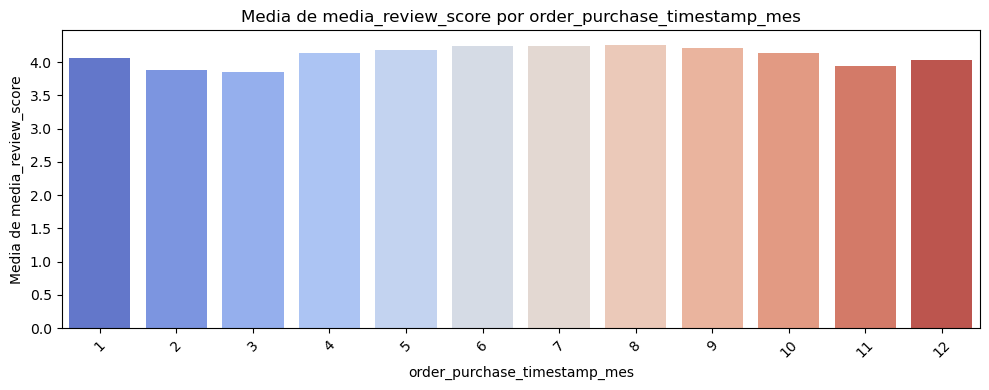

C:\Users\usuario\AppData\Local\Temp\ipykernel_15188\808447261.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='media_review_score', data=promedio, palette='coolwarm')


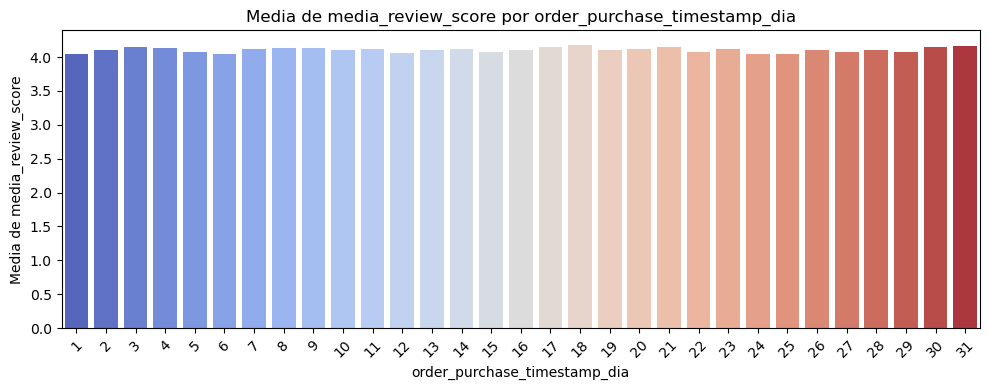

C:\Users\usuario\AppData\Local\Temp\ipykernel_15188\808447261.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='media_review_score', data=promedio, palette='coolwarm')


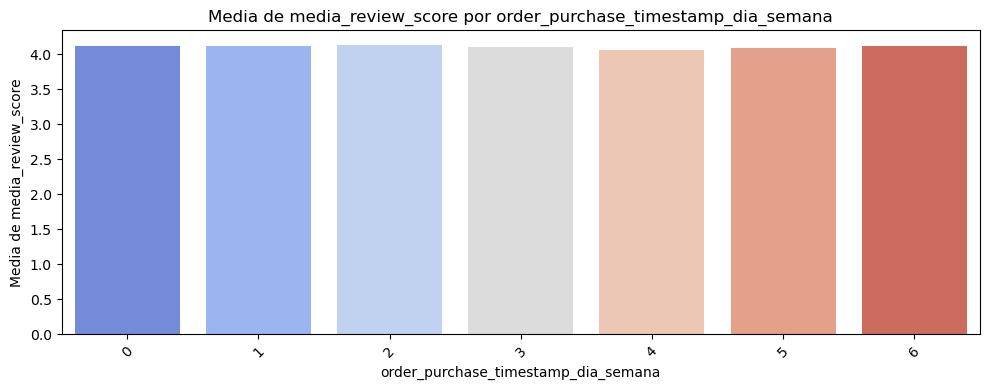

In [16]:
fecha_cols = [
    'fecha_ultima_review_año', 'fecha_ultima_review_mes',
    'fecha_ultima_review_dia', 'fecha_ultima_review_dia_semana',
    'order_purchase_timestamp_año', 'order_purchase_timestamp_mes',
    'order_purchase_timestamp_dia', 'order_purchase_timestamp_dia_semana'
]
for col in fecha_cols:
    plt.figure(figsize=(10,4))
    
    #media media_review_score
    promedio = data.groupby(col)['media_review_score'].mean().reset_index()
    
    sns.barplot(x=col, y='media_review_score', data=promedio, palette='coolwarm')
    
    plt.title(f'Media de media_review_score por {col}')
    plt.ylabel('Media de media_review_score')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 4.4 Top N vendedores 80%:

In [17]:
ventas_por_vendedor = (
    data.groupby('seller_id')['total_price']
    .sum()
    .sort_values(ascending=False)
)

C:\Users\usuario\AppData\Local\Temp\ipykernel_15188\3981642647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_vendedores.values, y=top20_vendedores.index, palette='viridis')


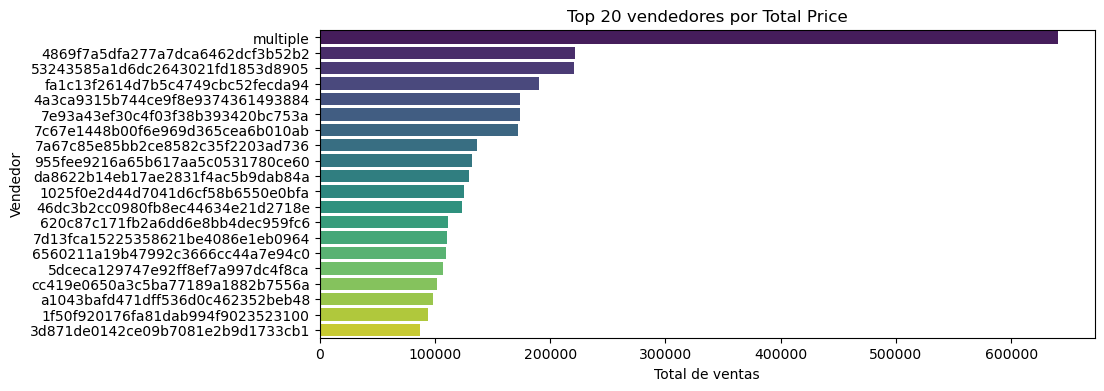

In [18]:
#influencia del valor 'multiple' ¿outlier? Sí
top20_vendedores = ventas_por_vendedor.head(20)

plt.figure(figsize=(10,4))
sns.barplot(x=top20_vendedores.values, y=top20_vendedores.index, palette='viridis')
plt.title('Top 20 vendedores por Total Price')
plt.xlabel('Total de ventas')
plt.ylabel('Vendedor')
plt.show()

In [19]:
ventas_acumuladas = ventas_por_vendedor.cumsum()
porcentaje_acumulado = ventas_acumuladas / ventas_por_vendedor.sum()

In [20]:
#Menos del 20% de vendedores explican el 80% de las ventas
num_vendedores_80 = (porcentaje_acumulado <= 0.80).sum()
num_vendedores_80

np.int64(517)

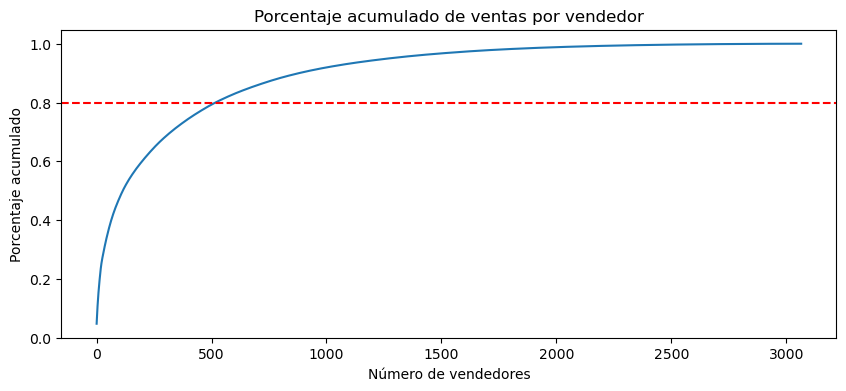

In [21]:
plt.figure(figsize=(10,4))
plt.plot(porcentaje_acumulado.values)
plt.axhline(0.80, color='red', linestyle='--')
plt.title('Porcentaje acumulado de ventas por vendedor')
plt.xlabel('Número de vendedores')
plt.ylabel('Porcentaje acumulado')
plt.show()

### 4.5 Top N productos 80%:

In [22]:
ventas_por_producto = (
    data.groupby('product_id')['total_price']
    .sum()
    .sort_values(ascending=False)
)

C:\Users\usuario\AppData\Local\Temp\ipykernel_15188\2466291929.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_productos.values, y=top20_productos.index, palette='magma')


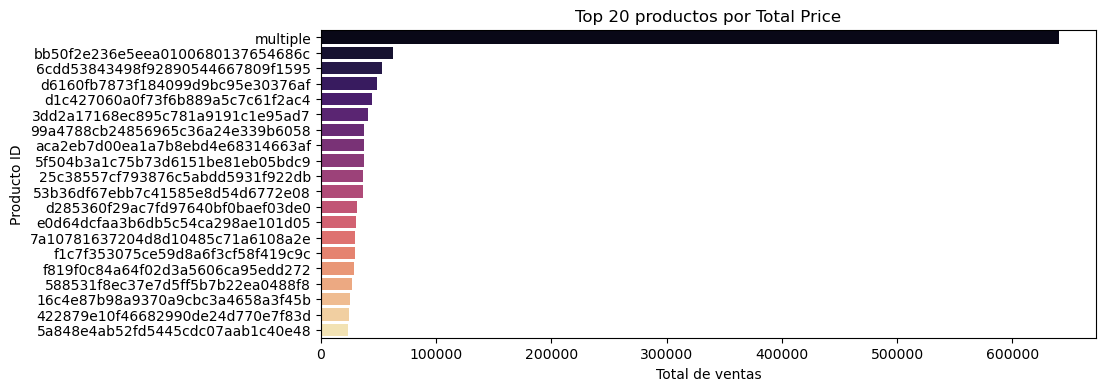

In [23]:
#influencia del valor 'multiple' ¿outlier? Sí
top20_productos = ventas_por_producto.head(20)

plt.figure(figsize=(10,4))
sns.barplot(x=top20_productos.values, y=top20_productos.index, palette='magma')
plt.title('Top 20 productos por Total Price')
plt.xlabel('Total de ventas')
plt.ylabel('Producto ID')
plt.show()

In [24]:
ventas_acumuladas_prod = ventas_por_producto.cumsum()
porcentaje_acumulado_prod = ventas_acumuladas_prod / ventas_por_producto.sum()

In [25]:
#Menos del 30% de productos explican el 80% de las ventas
num_productos_80 = (porcentaje_acumulado_prod <= 0.80).sum()
num_productos_80

np.int64(7645)

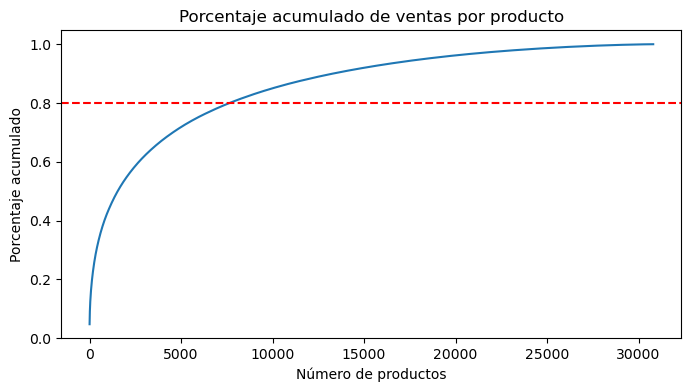

In [26]:
plt.figure(figsize=(8,4))
plt.plot(porcentaje_acumulado_prod.values)
plt.axhline(0.80, color='red', linestyle='--')
plt.title('Porcentaje acumulado de ventas por producto')
plt.xlabel('Número de productos')
plt.ylabel('Porcentaje acumulado')
plt.show()

## 5. OUTLIERS HAY MUCHOS y son muy importantes para KNN porque este modelo usa distancias

In [27]:
num_multiple = (data['seller_id'] == 'multiple').sum()
print(f"Filas con seller_id = 'multiple': {num_multiple}")

Filas con seller_id = 'multiple': 3197


In [28]:
num_multiple2 = (data['product_id'] == 'multiple').sum()
print(f"Filas con product_id = 'multiple': {num_multiple2}")

Filas con product_id = 'multiple': 3197


In [29]:
#Ver si son las mismas filas y que suponen un 3% de las observaciones
filtro = (data['seller_id'] == 'multiple') | (data['product_id'] == 'multiple')

num_filas_multiple = filtro.sum()
num_filas_multiple

np.int64(3197)

In [30]:
#Elimino las observaciones:
data = data[(data['seller_id'] != 'multiple') & (data['product_id'] != 'multiple')]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94719 entries, 0 to 97915
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Unnamed: 0                           94719 non-null  int64         
 1   order_id                             94719 non-null  object        
 2   media_review_score                   94719 non-null  int64         
 3   fecha_ultima_review                  94719 non-null  datetime64[ns]
 4   order_purchase_timestamp             94719 non-null  datetime64[ns]
 5   delivered_status                     94719 non-null  int64         
 6   delay_time                           94719 non-null  int64         
 7   customer_unique_id                   94719 non-null  object        
 8   customer_state                       94719 non-null  object        
 9   number_payments                      94719 non-null  float64       
 10  payment_value_s

### Compruebo con grafico VENDEDORES DE NUEVO

C:\Users\usuario\AppData\Local\Temp\ipykernel_15188\3372710881.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_vendedores.values, y=top20_vendedores.index, palette='viridis')


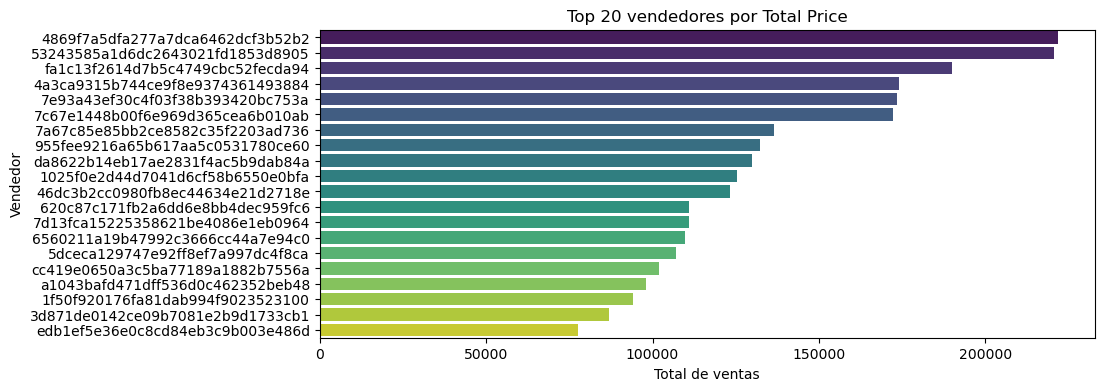

In [31]:
ventas_por_vendedor = (
    data.groupby('seller_id')['total_price']
    .sum()
    .sort_values(ascending=False)
)
top20_vendedores = ventas_por_vendedor.head(20)

plt.figure(figsize=(10,4))
sns.barplot(x=top20_vendedores.values, y=top20_vendedores.index, palette='viridis')
plt.title('Top 20 vendedores por Total Price')
plt.xlabel('Total de ventas')
plt.ylabel('Vendedor')
plt.show()

### GRÁFICAS con bigote para ver las desviaciones fuera del rango

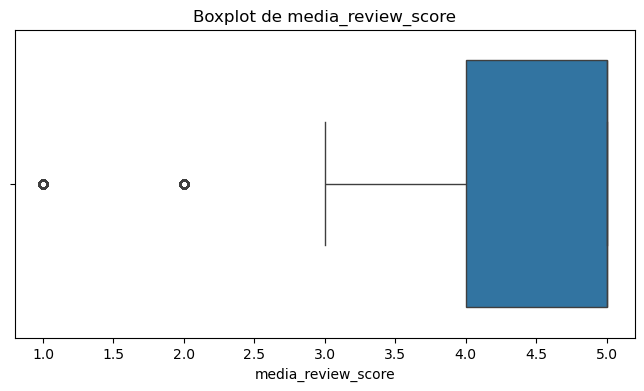

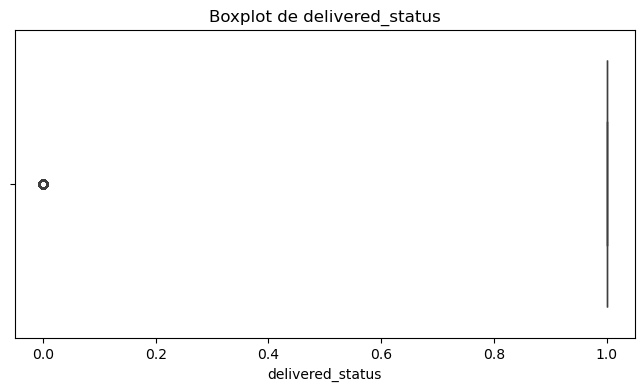

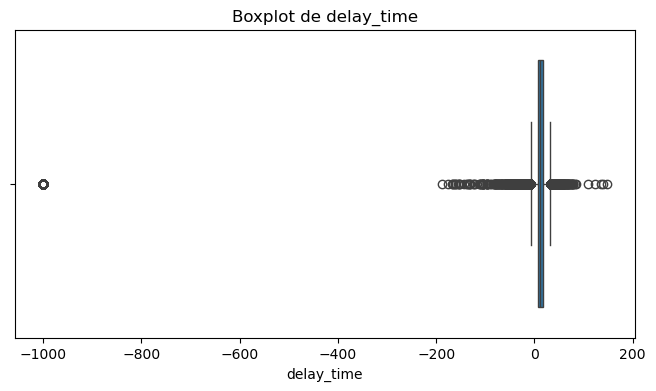

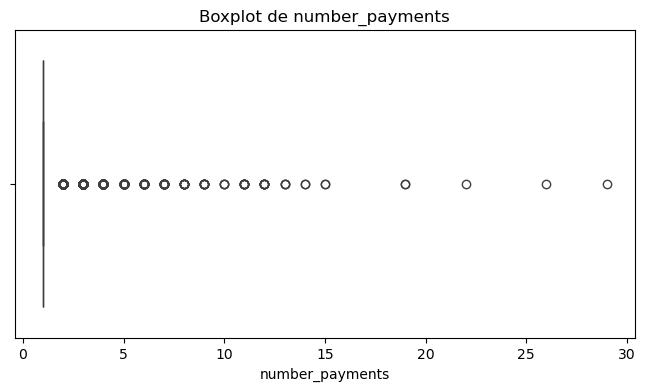

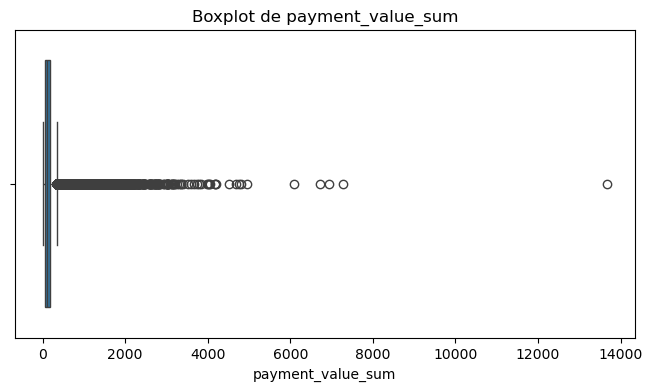

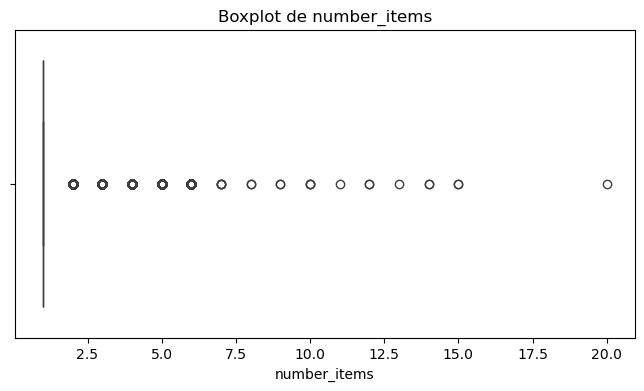

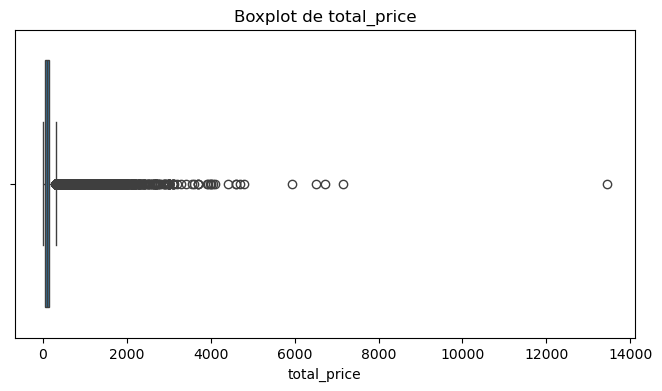

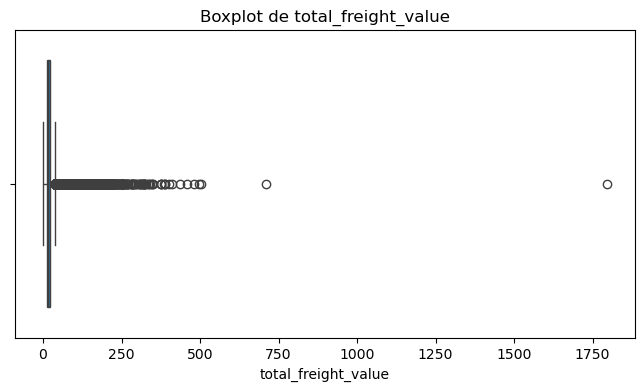

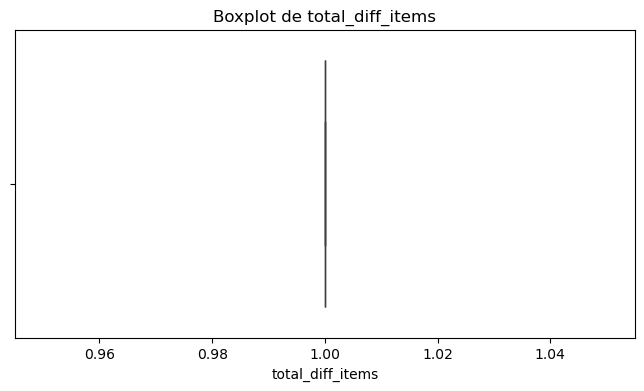

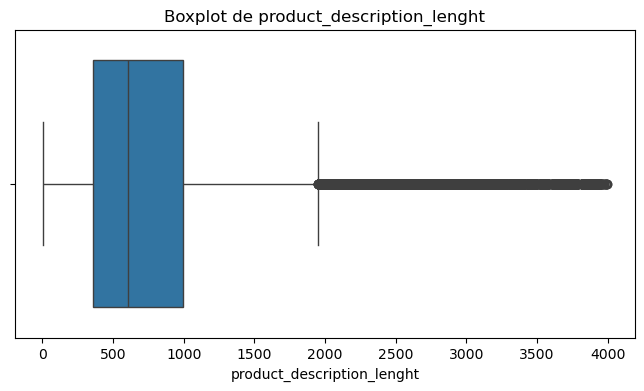

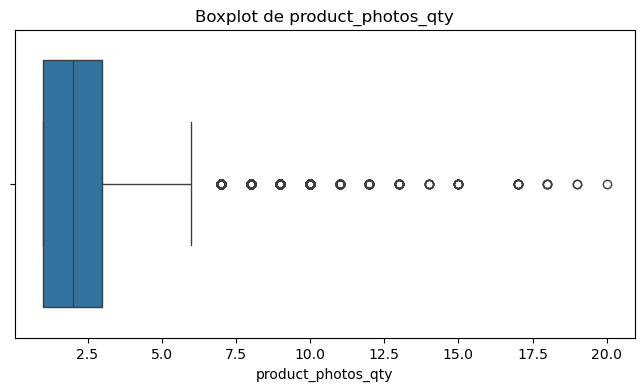

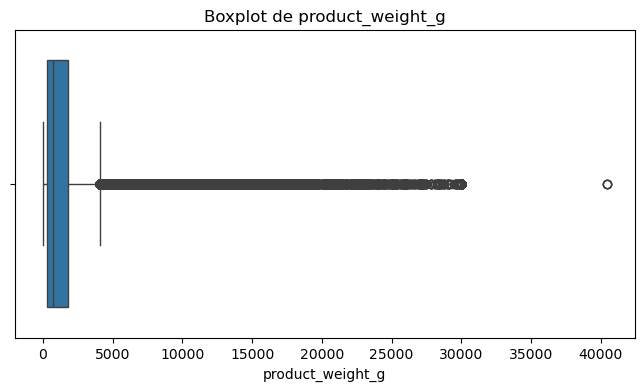

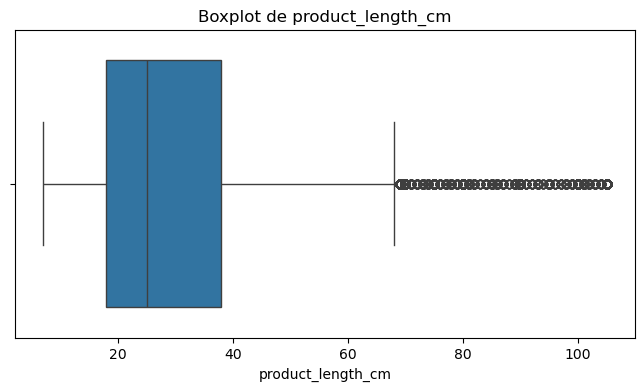

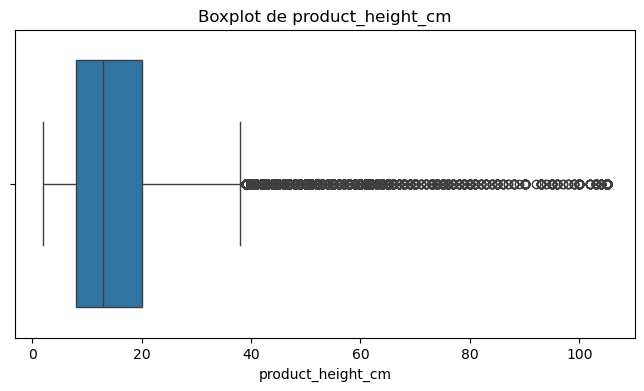

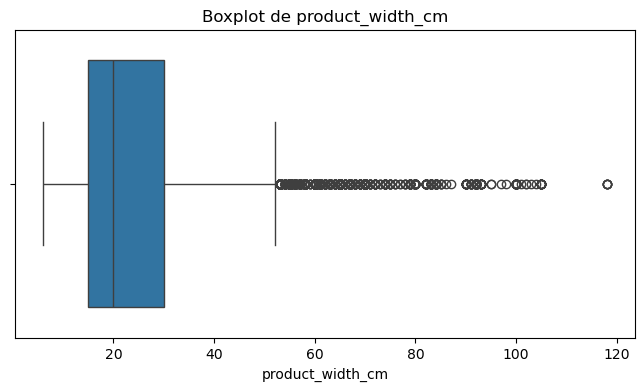

In [32]:
for col in numericas:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [33]:
columna = 'delay_time'

# Medidas básicas
media = data[columna].mean()
mediana = data[columna].median()
moda = data[columna].mode()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)
print("Mínimo:", data[columna].min())
print("Máximo:", data[columna].max())
print(data[columna].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

# Detección de outliers con IQR
Q1 = data[columna].quantile(0.25)
Q3 = data[columna].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Límite inferior:", limite_inferior)
print("Límite superior:", limite_superior)

#outliers = ((data[columna] < limite_inferior) | (data[columna] > limite_superior)).sum()
outliers = ((data[columna] == -1000)).sum()
print(f"Número de outliers en {columna}: {outliers}")

Media: -10.07244586619369
Mediana: 12.0
Moda: 0    14
Name: delay_time, dtype: int64
Mínimo: -1000
Máximo: 147
0.01   -1000.0
0.05      -8.0
0.25       7.0
0.50      12.0
0.75      17.0
0.95      26.0
0.99      35.0
Name: delay_time, dtype: float64
Límite inferior: -8.0
Límite superior: 32.0
Número de outliers en delay_time: 2050


In [34]:
columna = 'number_payments'

# Medidas básicas
media = data[columna].mean()
mediana = data[columna].median()
moda = data[columna].mode()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)
print("Mínimo:", data[columna].min())
print("Máximo:", data[columna].max())
print(data[columna].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

# Detección de outliers con IQR
Q1 = data[columna].quantile(0.25)
Q3 = data[columna].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Límite inferior:", limite_inferior)
print("Límite superior:", limite_superior)

#outliers = ((data[columna] < limite_inferior) | (data[columna] > limite_superior)).sum()
outliers = ((data[columna] >15)).sum()
print(f"Número de outliers en {columna}: {outliers}")

Media: 1.044077745753228
Mediana: 1.0
Moda: 0    1.0
Name: number_payments, dtype: float64
Mínimo: 1.0
Máximo: 29.0
0.01    1.0
0.05    1.0
0.25    1.0
0.50    1.0
0.75    1.0
0.95    1.0
0.99    2.0
Name: number_payments, dtype: float64
Límite inferior: 1.0
Límite superior: 1.0
Número de outliers en number_payments: 5


In [35]:
columna = 'payment_value_sum'

# Medidas básicas
media = data[columna].mean()
mediana = data[columna].median()
moda = data[columna].mode()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)
print("Mínimo:", data[columna].min())
print("Máximo:", data[columna].max())
print(data[columna].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

# Detección de outliers con IQR
Q1 = data[columna].quantile(0.25)
Q3 = data[columna].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Límite inferior:", limite_inferior)
print("Límite superior:", limite_superior)

#outliers = ((data[columna] < limite_inferior) | (data[columna] > limite_superior)).sum()
outliers = ((data[columna] >5000)).sum()
print(f"Número de outliers en {columna}: {outliers}")

Media: 157.52914293858674
Mediana: 103.04
Moda: 0    77.57
Name: payment_value_sum, dtype: float64
Mínimo: 9.59
Máximo: 13664.08
0.01      22.360
0.05      32.190
0.25      60.865
0.50     103.040
0.75     173.090
0.95     440.190
0.99    1053.515
Name: payment_value_sum, dtype: float64
Límite inferior: -107.47250000000001
Límite superior: 341.4275
Número de outliers en payment_value_sum: 5


In [36]:
columna = 'number_items'

# Medidas básicas
media = data[columna].mean()
mediana = data[columna].median()
moda = data[columna].mode()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)
print("Mínimo:", data[columna].min())
print("Máximo:", data[columna].max())
print(data[columna].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

# Detección de outliers con IQR
Q1 = data[columna].quantile(0.25)
Q3 = data[columna].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Límite inferior:", limite_inferior)
print("Límite superior:", limite_superior)

#outliers = ((data[columna] < limite_inferior) | (data[columna] > limite_superior)).sum()
outliers = ((data[columna]>10)).sum()
print(f"Número de outliers en {columna}: {outliers}")

Media: 1.098322406275404
Mediana: 1.0
Moda: 0    1.0
Name: number_items, dtype: float64
Mínimo: 1.0
Máximo: 20.0
0.01    1.0
0.05    1.0
0.25    1.0
0.50    1.0
0.75    1.0
0.95    2.0
0.99    3.0
Name: number_items, dtype: float64
Límite inferior: 1.0
Límite superior: 1.0
Número de outliers en number_items: 9


In [37]:
columna = 'total_price'

# Medidas básicas
media = data[columna].mean()
mediana = data[columna].median()
moda = data[columna].mode()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)
print("Mínimo:", data[columna].min())
print("Máximo:", data[columna].max())
print(data[columna].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

# Detección de outliers con IQR
Q1 = data[columna].quantile(0.25)
Q3 = data[columna].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Límite inferior:", limite_inferior)
print("Límite superior:", limite_superior)

#outliers = ((data[columna] < limite_inferior) | (data[columna] > limite_superior)).sum()
outliers = ((data[columna]>5000)|(data[columna]<0)).sum()
print(f"Número de outliers en {columna}: {outliers}")

Media: 135.41570381866364
Mediana: 84.9
Moda: 0    59.9
Name: total_price, dtype: float64
Mínimo: 0.85
Máximo: 13440.0
0.01     11.900
0.05     18.990
0.25     45.000
0.50     84.900
0.75    149.000
0.95    399.000
0.99    997.476
Name: total_price, dtype: float64
Límite inferior: -111.0
Límite superior: 305.0
Número de outliers en total_price: 5


In [38]:
columna = 'total_freight_value'

# Medidas básicas
media = data[columna].mean()
mediana = data[columna].median()
moda = data[columna].mode()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)
print("Mínimo:", data[columna].min())
print("Máximo:", data[columna].max())
print(data[columna].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

# Detección de outliers con IQR
Q1 = data[columna].quantile(0.25)
Q3 = data[columna].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Límite inferior:", limite_inferior)
print("Límite superior:", limite_superior)

outliers = ((data[columna] > 1000)).sum()
print(f"Número de outliers en {columna}: {outliers}")

Media: 22.087026678913418
Mediana: 16.92
Moda: 0    15.1
Name: total_freight_value, dtype: float64
Mínimo: 0.0
Máximo: 1794.96
0.01     7.3900
0.05     7.8700
0.25    13.7000
0.50    16.9200
0.75    23.2700
0.95    53.0010
0.99    99.6246
Name: total_freight_value, dtype: float64
Límite inferior: -0.6550000000000011
Límite superior: 37.625
Número de outliers en total_freight_value: 1


In [39]:
filtro = (
    (data['delay_time'] == -1000) |  #2049 solamente con este -1000
    (data['number_payments'] > 15) |
    (data['payment_value_sum'] > 5000) |
    (data['number_items'] > 10) |
    (data['total_price'] > 5000) |
    (data['total_freight_value'] > 1000)
)

# Contar cuántas filas cumplen al menos una condición
num_observaciones = filtro.sum()
num_observaciones

np.int64(2069)

In [40]:
data = data[~filtro]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92650 entries, 0 to 97915
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Unnamed: 0                           92650 non-null  int64         
 1   order_id                             92650 non-null  object        
 2   media_review_score                   92650 non-null  int64         
 3   fecha_ultima_review                  92650 non-null  datetime64[ns]
 4   order_purchase_timestamp             92650 non-null  datetime64[ns]
 5   delivered_status                     92650 non-null  int64         
 6   delay_time                           92650 non-null  int64         
 7   customer_unique_id                   92650 non-null  object        
 8   customer_state                       92650 non-null  object        
 9   number_payments                      92650 non-null  float64       
 10  payment_value_s

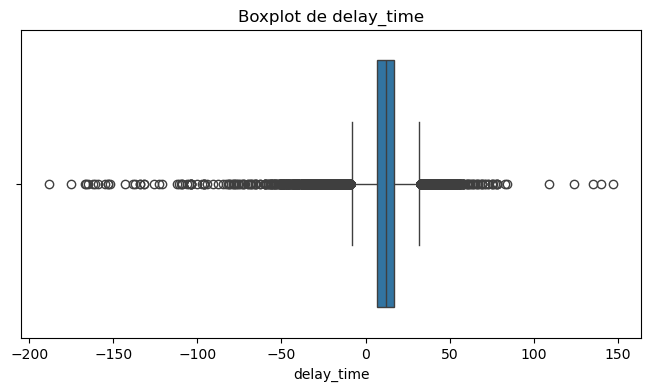

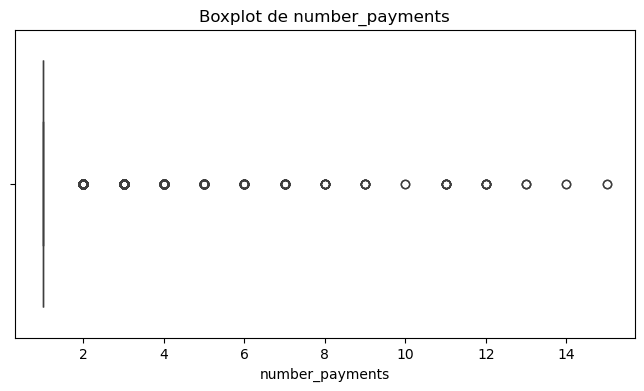

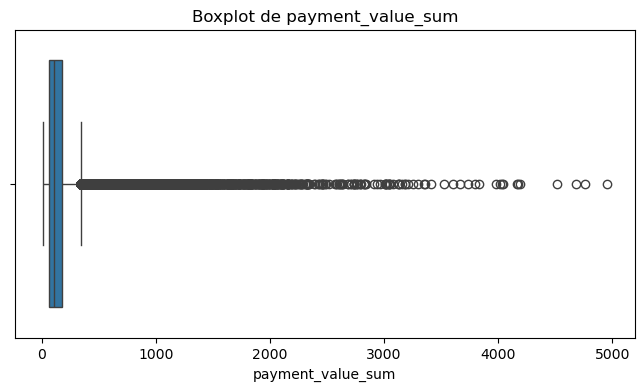

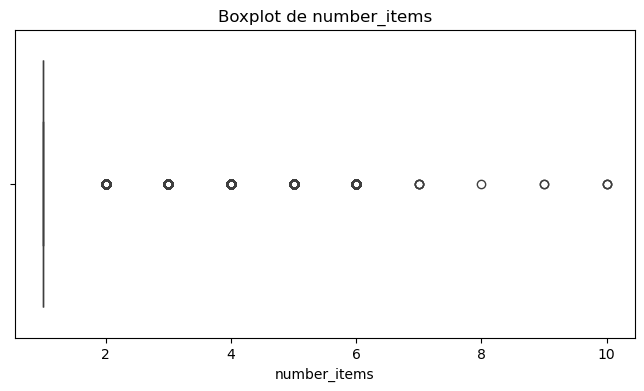

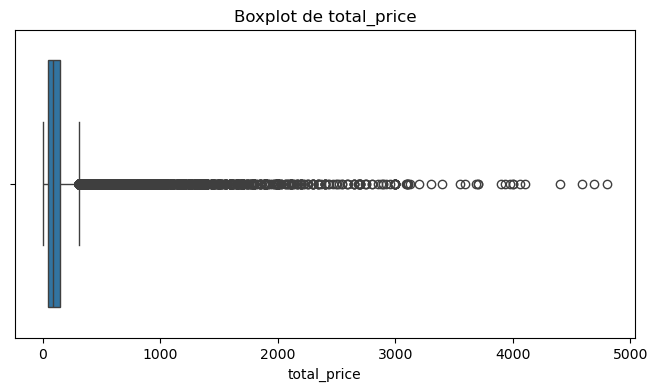

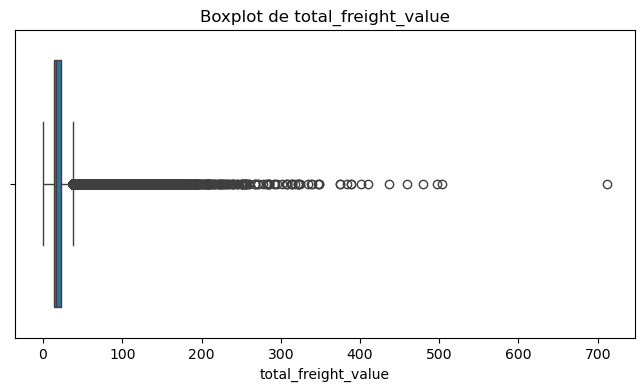

In [41]:
num_SIN_out = ['delay_time', 'number_payments', 'payment_value_sum',
             'number_items', 'total_price', 'total_freight_value']

for col in num_SIN_out:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## 6. Nuevas columnas

In [42]:
data['y_satisfecho'] = (data['media_review_score'] == 5).astype(int)
data['y_satisfecho'].value_counts()

y_satisfecho
1    55372
0    37278
Name: count, dtype: int64

In [43]:
data[['media_review_score', 'y_satisfecho']].head()

,media_review_score,y_satisfecho
0,5,1
1,4,0
2,5,1
3,4,0
4,5,1


In [44]:
topN_vendedores = ventas_por_vendedor.head(num_vendedores_80).index
data['seller_topN'] = data['seller_id'].isin(topN_vendedores).astype(int)

In [45]:
topN_productos = ventas_por_producto.head(num_productos_80).index
data['product_topN'] = data['product_id'].isin(topN_productos).astype(int)

## 7. Eliminar columnas

- Unnamed:0. Es el número de fila
- fechas, las he descompuesto
- id's. KNN se basa en distancias y estos valores únicos crean ruido
- datos desbalanceados, states y payment_type, agrupados
- media_reiew_score, convertida a y_satisfecho

In [46]:
#hecho
data = data.drop(columns=['Unnamed: 0'])

In [47]:
columnas_eliminar = [
    'order_id', 'customer_unique_id', 'product_id', 
    'seller_id','fecha_ultima_review', 'order_purchase_timestamp',
    'media_review_score','seller_state','customer_state','payment_type'
]
data.drop(columns=columnas_eliminar, inplace=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92650 entries, 0 to 97915
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   delivered_status                     92650 non-null  int64  
 1   delay_time                           92650 non-null  int64  
 2   number_payments                      92650 non-null  float64
 3   payment_value_sum                    92650 non-null  float64
 4   number_items                         92650 non-null  float64
 5   total_price                          92650 non-null  float64
 6   total_freight_value                  92650 non-null  float64
 7   total_diff_items                     92650 non-null  float64
 8   product_description_lenght           92650 non-null  float64
 9   product_photos_qty                   92650 non-null  float64
 10  product_weight_g                     92650 non-null  float64
 11  product_length_cm                

### 7.1.  Balanceo y agrupación de valores / nuevas columnas

## 8. Dummies

In [49]:
data = pd.get_dummies(
    data, 
    columns=['product_category_name_english','customer_state_grouped','seller_state_grouped','payment_type_grouped'],
    drop_first = True
)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92650 entries, 0 to 97915
Data columns (total 33 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   delivered_status                                             92650 non-null  int64  
 1   delay_time                                                   92650 non-null  int64  
 2   number_payments                                              92650 non-null  float64
 3   payment_value_sum                                            92650 non-null  float64
 4   number_items                                                 92650 non-null  float64
 5   total_price                                                  92650 non-null  float64
 6   total_freight_value                                          92650 non-null  float64
 7   total_diff_items                                             92650 non-null  floa

## 9. Normalización

In [51]:
numericas = data.select_dtypes(include=['float64', 'int64','int32']).columns
data[numericas] = (data[numericas] - data[numericas].min()) / (data[numericas].max() - data[numericas].min())

In [52]:
data.head(10)

,delivered_status,delay_time,number_payments,payment_value_sum,number_items,total_price,total_freight_value,total_diff_items,product_description_lenght,product_photos_qty,...,seller_topN,product_topN,product_category_name_english_Fashion and Personal Care,product_category_name_english_Home and Decoration,"product_category_name_english_Leisure, Toys and Arts",product_category_name_english_Miscellaneous and Other Items,product_category_name_english_Tools and Construction,customer_state_grouped_Southeast,seller_state_grouped_Southeast,payment_type_grouped_credit_card
0,1.0,0.588060,0.0,0.012670,0.0,0.012098,0.018683,NaN,0.148947,0.157895,...,1.0,1.0,False,False,False,True,False,True,True,True
1,1.0,0.570149,0.0,0.050648,0.0,0.049821,0.028018,NaN,0.058927,0.052632,...,1.0,0.0,False,False,False,True,False,True,True,True
2,1.0,0.602985,0.0,0.041953,0.0,0.041297,0.025122,NaN,0.173270,0.052632,...,0.0,1.0,False,True,False,False,False,True,True,True
3,1.0,0.579104,0.0,0.003277,0.0,0.002530,0.017980,NaN,0.119358,0.000000,...,0.0,0.0,True,False,False,False,False,True,True,True
4,1.0,0.608955,0.0,0.042190,0.0,0.041485,0.025502,NaN,0.101555,0.000000,...,0.0,1.0,False,False,False,False,True,True,False,True
5,1.0,0.605970,0.0,0.005060,0.0,0.004387,0.017840,NaN,0.138917,0.000000,...,0.0,0.0,False,True,False,False,False,True,True,False
6,1.0,0.611940,0.0,0.004485,0.0,0.003970,0.016659,NaN,0.203360,0.000000,...,1.0,0.0,False,False,False,False,False,True,True,True
7,1.0,0.608955,0.0,0.176321,0.0,0.168638,0.099462,NaN,0.327482,0.105263,...,0.0,1.0,False,False,False,False,True,True,True,True
8,1.0,0.561194,0.0,0.029957,0.0,0.030241,0.016378,NaN,0.122618,0.000000,...,1.0,0.0,True,False,False,False,False,True,True,True
9,1.0,0.617910,0.0,0.011294,0.0,0.011075,0.016026,NaN,0.297894,0.000000,...,1.0,0.0,False,False,True,False,False,True,True,True


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92650 entries, 0 to 97915
Data columns (total 33 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   delivered_status                                             92650 non-null  float64
 1   delay_time                                                   92650 non-null  float64
 2   number_payments                                              92650 non-null  float64
 3   payment_value_sum                                            92650 non-null  float64
 4   number_items                                                 92650 non-null  float64
 5   total_price                                                  92650 non-null  float64
 6   total_freight_value                                          92650 non-null  float64
 7   total_diff_items                                             0 non-null      floa

## 10. Separar de x de y 

In [54]:
X = data.drop(columns=['y_satisfecho'])
y = data['y_satisfecho']

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92650 entries, 0 to 97915
Data columns (total 32 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   delivered_status                                             92650 non-null  float64
 1   delay_time                                                   92650 non-null  float64
 2   number_payments                                              92650 non-null  float64
 3   payment_value_sum                                            92650 non-null  float64
 4   number_items                                                 92650 non-null  float64
 5   total_price                                                  92650 non-null  float64
 6   total_freight_value                                          92650 non-null  float64
 7   total_diff_items                                             0 non-null      floa

## 11. Separar test/train. 
Como no había nulos y hay muchas filas, no debe influir hacerlo ahora.
Sobre los pasos anteriores, no debe haber infuencia tampoco.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size = 0.75,
    test_size = 0.25
)

In [57]:
X_test = X_test.drop(columns=['total_diff_items'])
X_train = X_train.drop(columns=['total_diff_items'])

## 12. Premodelos:
- VIF no. No afecta la colinealidad en KNN
- PCA no. Para no perder interpretabilidad
- RFE sí Seleccionar variables a utilizar en el modelo.

In [58]:
# No sé cuántas en realidad. ProbarÉ con 10, 20, 25, 30 si hubiera 30 cols 
rfe = RFE(
    estimator = LinearRegression(), 
    n_features_to_select = 10 # cuantas variables tiene que elegir
)

# Entrenamos el selector con los datos
rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [59]:
X_train_final = X_train.loc[:, rfe.support_]
X_test_final = X_test.loc[:, rfe.support_]

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92650 entries, 0 to 97915
Data columns (total 32 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   delivered_status                                             92650 non-null  float64
 1   delay_time                                                   92650 non-null  float64
 2   number_payments                                              92650 non-null  float64
 3   payment_value_sum                                            92650 non-null  float64
 4   number_items                                                 92650 non-null  float64
 5   total_price                                                  92650 non-null  float64
 6   total_freight_value                                          92650 non-null  float64
 7   total_diff_items                                             0 non-null      floa

In [61]:
# Valores de n columnas para probar:
n_features_list = [5,10, 20, 25, 30]

# Diccionario para guardar columnas seleccionadas que usaremos para KNN:
rfe_results = {}

for n_features in n_features_list:
    print(f"\n--- Probando con {n_features} variables ---")
    
    # Creamos el RFE
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features)
    
    # Entrenamos solo con X_train y y_train
    rfe.fit(X_train, y_train)
    
    # Guardamos columnas seleccionadas
    selected_cols = X_train.columns[rfe.support_]
    rfe_results[n_features] = selected_cols
    
    # Mostramos
    print(f"Columnas seleccionadas ({len(selected_cols)}):")
    print(selected_cols.tolist())


--- Probando con 5 variables ---
Columnas seleccionadas (5):
['delay_time', 'payment_value_sum', 'total_price', 'total_freight_value', 'order_purchase_timestamp_año']

--- Probando con 10 variables ---
Columnas seleccionadas (10):
['delivered_status', 'delay_time', 'payment_value_sum', 'number_items', 'total_price', 'total_freight_value', 'fecha_ultima_review_año', 'fecha_ultima_review_mes', 'order_purchase_timestamp_año', 'order_purchase_timestamp_mes']

--- Probando con 20 variables ---
Columnas seleccionadas (20):
['delivered_status', 'delay_time', 'payment_value_sum', 'number_items', 'total_price', 'total_freight_value', 'product_photos_qty', 'product_weight_g', 'fecha_ultima_review_año', 'fecha_ultima_review_mes', 'fecha_ultima_review_dia', 'fecha_ultima_review_dia_semana', 'order_purchase_timestamp_año', 'order_purchase_timestamp_mes', 'order_purchase_timestamp_dia', 'product_category_name_english_Fashion and Personal Care', 'product_category_name_english_Leisure, Toys and Arts'

## 13. Ajustar modelo KNN

In [62]:
n_neighbors = 5 
acc_results = {}

for n_features, cols in rfe_results.items():
    # Entrenar KNN con las columnas seleccionadas
    modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    modelo_knn.fit(X_train[cols], y_train)
    
    # Predecir en test
    y_pred = modelo_knn.predict(X_test[cols])
    
    # Calcular MSE
    accuracy = accuracy_score(y_test, y_pred)
    acc_results[n_features] = accuracy
    print(f"n_features={n_features}, acc={accuracy:.4f}")

n_features=5, acc=0.5882
n_features=10, acc=0.5909
n_features=20, acc=0.5792
n_features=25, acc=0.5719
n_features=30, acc=0.5668


In [63]:
n_neighbors = 7 
acc_results = {}

for n_features, cols in rfe_results.items():
    # Entrenar KNN con las columnas seleccionadas
    modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    modelo_knn.fit(X_train[cols], y_train)
    
    # Predecir en test
    y_pred = modelo_knn.predict(X_test[cols])
    
    # Calcular acc
    accuracy = accuracy_score(y_test, y_pred)
    acc_results[n_features] = accuracy
    print(f"n_features={n_features}, acc={accuracy:.4f}")

n_features=5, acc=0.5987
n_features=10, acc=0.5980
n_features=20, acc=0.5885
n_features=25, acc=0.5782
n_features=30, acc=0.5712


In [64]:
# Valores de n columnas para probar:
n_features_list = [6,8,10,12]

# Diccionario para guardar columnas seleccionadas que usaremos para KNN:
rfe_results = {}

for n_features in n_features_list:
    print(f"\n--- Probando con {n_features} variables ---")
    
    # Creamos el RFE
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features)
    
    # Entrenamos solo con X_train y y_train
    rfe.fit(X_train, y_train)
    
    # Guardamos columnas seleccionadas
    selected_cols = X_train.columns[rfe.support_]
    rfe_results[n_features] = selected_cols
    
    # Mostramos
    print(f"Columnas seleccionadas ({len(selected_cols)}):")
    print(selected_cols.tolist())


--- Probando con 6 variables ---
Columnas seleccionadas (6):
['delay_time', 'payment_value_sum', 'total_price', 'total_freight_value', 'fecha_ultima_review_año', 'order_purchase_timestamp_año']

--- Probando con 8 variables ---
Columnas seleccionadas (8):
['delay_time', 'payment_value_sum', 'total_price', 'total_freight_value', 'fecha_ultima_review_año', 'fecha_ultima_review_mes', 'order_purchase_timestamp_año', 'order_purchase_timestamp_mes']

--- Probando con 10 variables ---
Columnas seleccionadas (10):
['delivered_status', 'delay_time', 'payment_value_sum', 'number_items', 'total_price', 'total_freight_value', 'fecha_ultima_review_año', 'fecha_ultima_review_mes', 'order_purchase_timestamp_año', 'order_purchase_timestamp_mes']

--- Probando con 12 variables ---
Columnas seleccionadas (12):
['delivered_status', 'delay_time', 'payment_value_sum', 'number_items', 'total_price', 'total_freight_value', 'fecha_ultima_review_año', 'fecha_ultima_review_mes', 'fecha_ultima_review_dia', 'ord

In [65]:
n_neighbors = 7 
acc_results = {}

for n_features, cols in rfe_results.items():
    # Entrenar KNN con las columnas seleccionadas
    modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    modelo_knn.fit(X_train[cols], y_train)
    
    # Predecir en test
    y_pred = modelo_knn.predict(X_test[cols])
    
    # Calcular acc
    accuracy = accuracy_score(y_test, y_pred)
    acc_results[n_features] = accuracy
    print(f"n_features={n_features}, acc={accuracy:.4f}")

n_features=6, acc=0.5994
n_features=8, acc=0.5962
n_features=10, acc=0.5980
n_features=12, acc=0.5923


In [66]:
# Valores de n columnas para probar:
n_features_list = [8,12,14,16]

# Diccionario para guardar columnas seleccionadas que usaremos para KNN:
rfe_results = {}

for n_features in n_features_list:
    print(f"\n--- Probando con {n_features} variables ---")
    
    # Creamos el RFE
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features)
    
    # Entrenamos solo con X_train y y_train
    rfe.fit(X_train, y_train)
    
    # Guardamos columnas seleccionadas
    selected_cols = X_train.columns[rfe.support_]
    rfe_results[n_features] = selected_cols
    
    # Mostramos
    print(f"Columnas seleccionadas ({len(selected_cols)}):")
    print(selected_cols.tolist())


--- Probando con 8 variables ---
Columnas seleccionadas (8):
['delay_time', 'payment_value_sum', 'total_price', 'total_freight_value', 'fecha_ultima_review_año', 'fecha_ultima_review_mes', 'order_purchase_timestamp_año', 'order_purchase_timestamp_mes']

--- Probando con 12 variables ---
Columnas seleccionadas (12):
['delivered_status', 'delay_time', 'payment_value_sum', 'number_items', 'total_price', 'total_freight_value', 'fecha_ultima_review_año', 'fecha_ultima_review_mes', 'fecha_ultima_review_dia', 'order_purchase_timestamp_año', 'order_purchase_timestamp_mes', 'order_purchase_timestamp_dia']

--- Probando con 14 variables ---
Columnas seleccionadas (14):
['delivered_status', 'delay_time', 'payment_value_sum', 'number_items', 'total_price', 'total_freight_value', 'product_photos_qty', 'product_weight_g', 'fecha_ultima_review_año', 'fecha_ultima_review_mes', 'fecha_ultima_review_dia', 'order_purchase_timestamp_año', 'order_purchase_timestamp_mes', 'order_purchase_timestamp_dia']

-

In [67]:
n_neighbors = 7 
acc_results = {}

for n_features, cols in rfe_results.items():
    # Entrenar KNN con las columnas seleccionadas
    modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    modelo_knn.fit(X_train[cols], y_train)
    
    # Predecir en test
    y_pred = modelo_knn.predict(X_test[cols])
    
    # Calcular acc
    accuracy = accuracy_score(y_test, y_pred)
    acc_results[n_features] = accuracy
    print(f"n_features={n_features}, acc={accuracy:.4f}")

n_features=8, acc=0.5962
n_features=12, acc=0.5923
n_features=14, acc=0.5926
n_features=16, acc=0.5901


In [68]:
n_neighbors = 9 
acc_results = {}

for n_features, cols in rfe_results.items():
    # Entrenar KNN con las columnas seleccionadas
    modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    modelo_knn.fit(X_train[cols], y_train)
    
    # Predecir en test
    y_pred = modelo_knn.predict(X_test[cols])
    
    # Calcular acc
    accuracy = accuracy_score(y_test, y_pred)
    acc_results[n_features] = accuracy
    print(f"n_features={n_features}, acc={accuracy:.4f}")

n_features=8, acc=0.6010
n_features=12, acc=0.5998
n_features=14, acc=0.6020
n_features=16, acc=0.5939


In [69]:
n_neighbors = 11 
acc_results = {}

for n_features, cols in rfe_results.items():
    # Entrenar KNN con las columnas seleccionadas
    modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    modelo_knn.fit(X_train[cols], y_train)
    
    # Predecir en test
    y_pred = modelo_knn.predict(X_test[cols])
    
    # Calcular acc
    accuracy = accuracy_score(y_test, y_pred)
    acc_results[n_features] = accuracy
    print(f"n_features={n_features}, acc={accuracy:.4f}")

n_features=8, acc=0.6062
n_features=12, acc=0.6086
n_features=14, acc=0.6060
n_features=16, acc=0.5970


## 14. Validar modelo con data_test.

In [70]:
# 8 columnas y 11 vecinos

In [71]:
# Crear RFE para seleccionar 8 columnas
rfe = RFE(
    estimator=LinearRegression(),  
    n_features_to_select=8                       
)

# Entrenar RFE solo con X_train y y_train
rfe.fit(X_train, y_train)

# Columnas seleccionadas
selected_cols = X_train.columns[rfe.support_]
print("Columnas seleccionadas (8):")
print(selected_cols.tolist())

# Transformar X_train y X_test usando esas columnas
X_train_final = X_train[selected_cols]
X_test_final = X_test[selected_cols]

Columnas seleccionadas (8):
['delay_time', 'payment_value_sum', 'total_price', 'total_freight_value', 'fecha_ultima_review_año', 'fecha_ultima_review_mes', 'order_purchase_timestamp_año', 'order_purchase_timestamp_mes']


In [72]:
# Crear el modelo KNN
modelo_knn = KNeighborsClassifier(n_neighbors=11)

# Entrenar con las columnas seleccionadas
modelo_knn.fit(X_train_final, y_train)

KNeighborsClassifier(n_neighbors=11)

In [73]:
y_pred = modelo_knn.predict(X_test_final)
y_pred

array([1., 1., 1., ..., 0., 1., 1.])

## 15. Calcular matriz de confusión

In [74]:
matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[ 3002,  6322],
       [ 2799, 11040]])

In [75]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

## 16. Calcular Accuracy, sensibilidad, especificidad

In [76]:
(TN + TP) / (TN + TP + FN + FP)
# del total de predicciones se aciertan el 61%

np.float64(0.6062254457540043)

In [77]:
TP / (TP + FN)
# del total tot_satisfechas acerté el 80%

np.float64(0.7977455018426187)

In [78]:
TN / (TN + FP)
# del total no tot_satisfechos, acerté el 30%

np.float64(0.32196482196482196)

## 17. Graficar curva de ROC

In [79]:
y_test.unique()

array([0., 1.])

In [80]:
selected_cols = X_train_final.columns

# Predecir solo con esas columnas
X_test_final = X_test[selected_cols]
y_pred_proba = modelo_knn.predict_proba(X_test_final)[:, 1] 

In [81]:
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_pred_proba)

<Axes: >

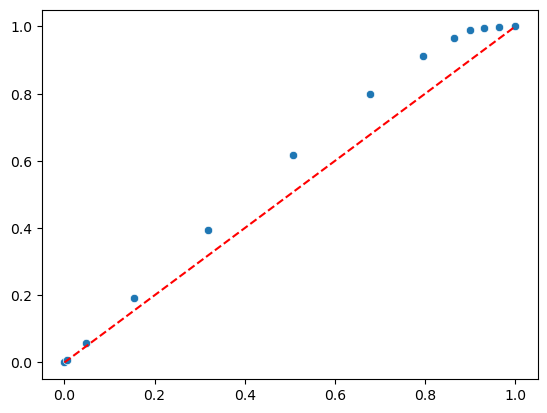

In [82]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x

sns.lineplot(x = recta_x, y = recta_y, ls = "--",  color = "red")
sns.scatterplot(x = especificidad_inv, y = sensibilidad)

## 18. Calcular el area bajo la curva

In [83]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc

np.float64(0.5784838638458842)

In [84]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.7076696259735265
